# Compute Speech rate

## Linear regression 

In [87]:
%cd .\module
%run module_compute_speech_rate.ipynb
%cd ..

C:\Users\simon\Documents\GitHub\LUCID\Code\module
C:\Users\simon\Documents\GitHub\LUCID\Code


           features  estimate_coefficients
0  lenght_utterance              -0.000458
1   distance_to_end              -0.000258
2   median_duration               0.974137

Median Duration 0.205250
Median Expectated Duration 0.208440
Average Duration 0.246159
Average Expectated Duration 0.246159


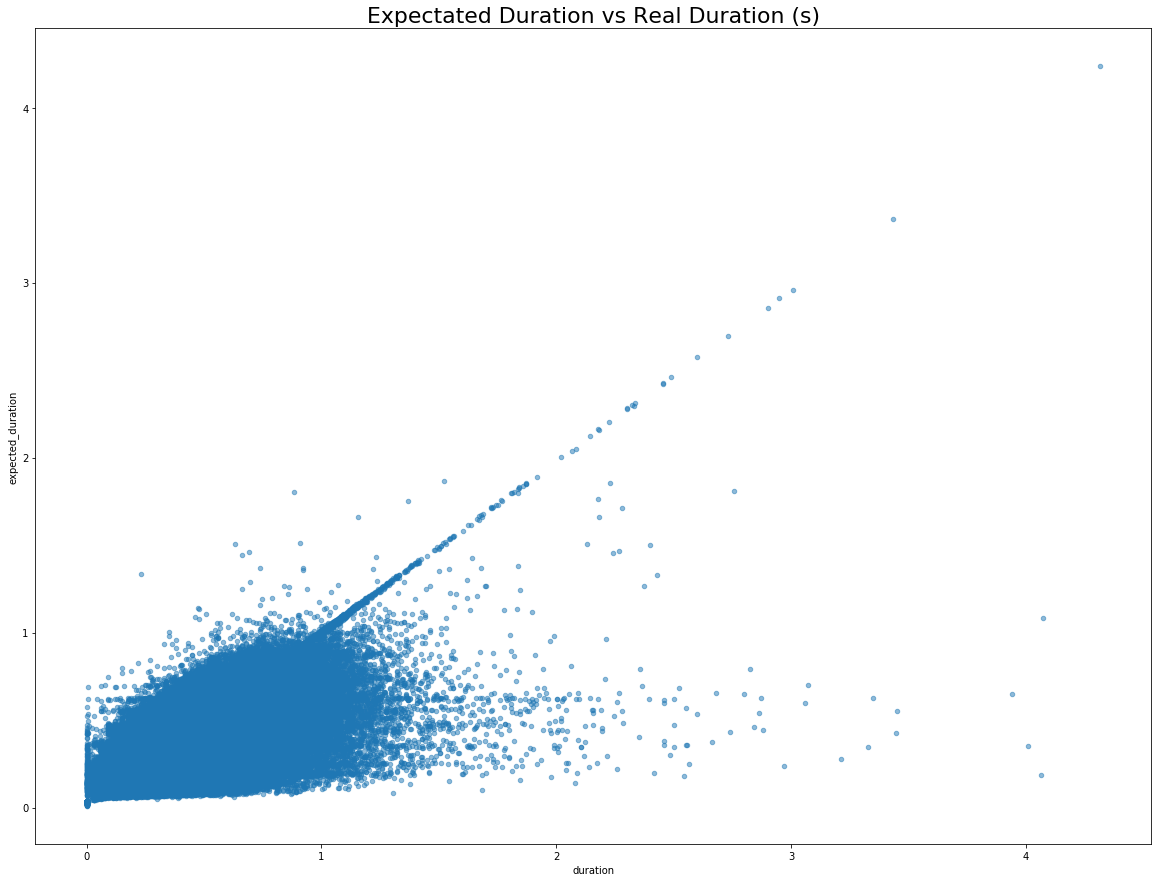

In [69]:
#X['expected_duration'] = regr.predict(X[['median_duration']])
Test_size = 0
X_regr = downoad_data(7,'X')
[regr,parameters,X_train, Y_train]= linear_regression_parameter(X_regr, Test_size)

X_regr['expected_duration'] = regr.predict(X_regr[['lenght_utterance','distance_to_end','median_duration']])

mpl.rcParams['agg.path.chunksize'] = 10000
X_regr.plot(x='duration', y='expected_duration', kind='scatter',figsize= (20,15), alpha = 0.5 )
plt.title('Expectated Duration vs Real Duration (s)', fontsize=22)

print('\nMedian Duration %f' %(X_regr['duration'].median()) )
print('Median Expectated Duration %f' %(X_regr['expected_duration'].median()) )
print('Average Duration %f' %(X_regr['duration'].mean()) )
print('Average Expectated Duration %f' %(X_regr['expected_duration'].mean()) )

## Speech rate

In [70]:
n_min_words = 4
n_directory = 9
word_to_exclude_expectation = ['[silence]', '[noise]', '[laughter]', 'um', '[vocalized-noise]', 'Um','','oh', 'uh']
n_directory_regression = 7
word_to_exclude_real = ['[noise]', '[laughter]', '[vocalized-noise]']

speech_rate = compute_speech_rate(n_min_words, X_regr, word_to_exclude_expectation, word_to_exclude_real, n_directory)

           features  estimate_coefficients
0  lenght_utterance              -0.000458
1   distance_to_end              -0.000258
2   median_duration               0.974137
Percent: [                    ] 0.00041017227235438887% 

c:\users\simon\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\simon\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Percent: [                    ] 0.0016406890894175555% 

KeyboardInterrupt: 

In [31]:
# standardize the data
speech_rate_std = standardize_speech_rate(5,9)
speech_rate_std['m_log_pointw_speech_rate'].mean()

1.712238955123293e-17

In [94]:
# filter the speakers that have at least a number of conversation =N_conv_min_per_speaker

N_conv_min_per_speaker = 8
n_min_words_per_utterance = 5
size_data = 1
n_directory = 9

speech_rate_filter = filter_speech_rate(N_conv_min_per_speaker,n_min_words_per_utterance, size_data, n_directory)


In [95]:
len(speech_rate_filter)

3458